## Letter Model with Nouns and Verbs: LDA

## Resources

In [5]:
import pickle
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim

## Get Data

In [6]:
# Get it back
with open("20240220_PhD_LtrLem-NV.txt", "rb") as fp:   # Unpickling
    data_lemmatized = pickle.load(fp)

## LDA Model

In [7]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [8]:
# View
print(corpus[:1])

[[(0, 1), (1, 4), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 2), (30, 1), (31, 2), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 1), (38, 3), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 4), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 4), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 3), (66, 3), (67, 7), (68, 1), (69, 2), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 2), (81, 2), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (102, 5), (103, 1), (104, 1), (105, 2), (106, 1), (107, 1), (108, 5), (109, 12), (110, 1

In [9]:
# To see word associated with id, use this code.
id2word[7]

'answer'

In [10]:
# This is the whole human readable list with frequencies
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abide', 1),
  ('accompany', 4),
  ('act', 1),
  ('agree', 1),
  ('aim', 1),
  ('angel', 1),
  ('annoyance', 1),
  ('answer', 2),
  ('ant', 1),
  ('anticipate', 1),
  ('anxiety', 1),
  ('appreciation', 1),
  ('arctic', 1),
  ('argument', 1),
  ('arm', 2),
  ('article', 1),
  ('assent', 2),
  ('assume', 1),
  ('asylum', 2),
  ('attend', 1),
  ('baggage', 1),
  ('barge', 1),
  ('bind', 2),
  ('blessing', 1),
  ('board', 1),
  ('breakfast', 1),
  ('bride', 1),
  ('brother', 2),
  ('burden', 1),
  ('bus', 2),
  ('business', 1),
  ('case', 2),
  ('catechism', 1),
  ('cause', 2),
  ('cedar', 1),
  ('cent', 2),
  ('check', 1),
  ('checker', 1),
  ('child', 3),
  ('choice', 1),
  ('choose', 2),
  ('class', 1),
  ('clerk', 1),
  ('clock', 1),
  ('coach', 1),
  ('coal', 1),
  ('cold', 1),
  ('come', 4),
  ('command', 1),
  ('company', 1),
  ('compound', 1),
  ('conclude', 1),
  ('confession', 1),
  ('consider', 1),
  ('consign', 1),
  ('consult', 1),
  ('contain', 1),
  ('conversation', 1),
 

## Identify the best number of topics

In [7]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [8]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=5, 
                                                        limit=25, 
                                                        step=1)

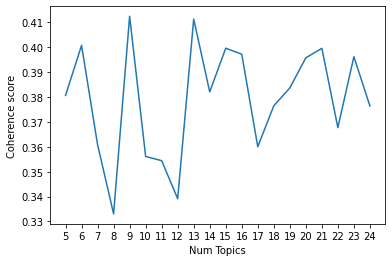

In [9]:
# Show graph
start = 5
limit = 25
step = 1
x = range(start, limit, step)
plt.xticks(range(min(x), max(x)+1))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('2024xxxx_PhD_TopicLetter-GenLDA.png', dpi=100)
plt.show()

In [10]:
# Print the coherence 
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.3807
Num Topics = 6 Coherence:  0.4008
Num Topics = 7 Coherence:  0.3609
Num Topics = 8 Coherence:  0.333
Num Topics = 9 Coherence:  0.4125
Num Topics = 10 Coherence:  0.3561
Num Topics = 11 Coherence:  0.3544
Num Topics = 12 Coherence:  0.3392
Num Topics = 13 Coherence:  0.4114
Num Topics = 14 Coherence:  0.3821
Num Topics = 15 Coherence:  0.3996
Num Topics = 16 Coherence:  0.3972
Num Topics = 17 Coherence:  0.36
Num Topics = 18 Coherence:  0.3765
Num Topics = 19 Coherence:  0.3837
Num Topics = 20 Coherence:  0.3958
Num Topics = 21 Coherence:  0.3996
Num Topics = 22 Coherence:  0.3677
Num Topics = 23 Coherence:  0.3962
Num Topics = 24 Coherence:  0.3764


In [11]:
#  perplexity scores
m = 0
n = 5
for i in model_list:
    print("Num Topics =", n, 'Perplexity: ', model_list[m].log_perplexity(corpus))
    n=n+1
    m=m+1

Num Topics = 5 Perplexity:  -7.679810607937728
Num Topics = 6 Perplexity:  -7.710749756610155
Num Topics = 7 Perplexity:  -7.7050564815559195
Num Topics = 8 Perplexity:  -7.731900480441569
Num Topics = 9 Perplexity:  -7.837227408929954
Num Topics = 10 Perplexity:  -7.976281164941379
Num Topics = 11 Perplexity:  -8.205513647375197
Num Topics = 12 Perplexity:  -8.512870651867232
Num Topics = 13 Perplexity:  -8.799778058409528
Num Topics = 14 Perplexity:  -9.045079502221675
Num Topics = 15 Perplexity:  -9.231812698487769
Num Topics = 16 Perplexity:  -9.430070421836158
Num Topics = 17 Perplexity:  -9.567573879055969
Num Topics = 18 Perplexity:  -9.705457948593141
Num Topics = 19 Perplexity:  -9.821789117282124
Num Topics = 20 Perplexity:  -9.933294087114282
Num Topics = 21 Perplexity:  -10.099447063284366
Num Topics = 22 Perplexity:  -10.225652374459033
Num Topics = 23 Perplexity:  -10.354254543234237
Num Topics = 24 Perplexity:  -10.526887944226939


Best (highest) coherence score is for the 6- (1), 9-topic model (4) and 13-topic models (8).

In [17]:
print(coherence_values[1])
print(coherence_values[4])
print(coherence_values[8])

0.4007900903285706
0.4125060641001423
0.4113665312133205


In [18]:
#GensimLDA_16.show_topics(formatted=False)
#GensimLDA_05.show_topics(formatted=False)

In [27]:
print("Coherence score for 6-topic model", coherence_values[1], "\n")

# View the topics
GensimLDA_6 = model_list[1]
pprint(sorted(GensimLDA_6.print_topics(num_words=10)))

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(GensimLDA_6, corpus, id2word, sort_topics=False, mds='mmds')

# Error for 13-topic visualization led to the "mmds" arguement in all visualizations. For details, see https://stackoverflow.com/questions/46379763/typeerror-object-of-type-complex-is-not-json-serializable-while-using-pyldavi

Coherence score for 6-topic model 0.4007900903285706 

[(0,
  '0.017*"write" + 0.016*"letter" + 0.013*"send" + 0.010*"year" + 0.010*"give" '
  '+ 0.010*"friend" + 0.009*"work" + 0.009*"life" + 0.007*"time" + '
  '0.007*"live"'),
 (1,
  '0.000*"sister" + 0.000*"feel" + 0.000*"see" + 0.000*"day" + 0.000*"give" + '
  '0.000*"look" + 0.000*"man" + 0.000*"place" + 0.000*"child" + 0.000*"take"'),
 (2,
  '0.011*"man" + 0.009*"sister" + 0.007*"crime" + 0.007*"law" + 0.007*"call" + '
  '0.006*"lordship" + 0.006*"nation" + 0.006*"enemy" + 0.005*"hand" + '
  '0.005*"speak"'),
 (3,
  '0.015*"day" + 0.013*"take" + 0.011*"time" + 0.010*"come" + 0.009*"give" + '
  '0.008*"child" + 0.007*"go" + 0.007*"see" + 0.007*"week" + 0.007*"work"'),
 (4,
  '0.022*"country" + 0.016*"land" + 0.013*"year" + 0.009*"place" + '
  '0.009*"acre" + 0.009*"dollar" + 0.008*"people" + 0.008*"farm" + '
  '0.006*"person" + 0.006*"state"'),
 (5,
  '0.015*"law" + 0.011*"state" + 0.010*"vote" + 0.010*"parliament" + '
  '0.008*"e

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.005341  0.231657       1        1  14.203818
1     -0.036939 -0.142457       2        1   0.004608
2     -0.252561  0.085961       3        1  10.117410
3      0.207399  0.143529       4        1  48.986438
4      0.268919 -0.104425       5        1  24.416511
5     -0.192160 -0.214266       6        1   2.271215, topic_info=            Term        Freq       Total Category  logprob  loglift
594      country  862.000000  862.000000  Default  30.0000  30.0000
306        write  536.000000  536.000000  Default  29.0000  29.0000
149         land  593.000000  593.000000  Default  28.0000  28.0000
152       letter  578.000000  578.000000  Default  27.0000  27.0000
1589       state  328.000000  328.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
438          man   13.219824  451.108808   Topic6  -5.3649   0.2549
41         class   10.915523  101.918119   Topic6  -5.5565   1.5509
1013  government   11.438224  218.859037   Topic6  -5.5097   0.8334
468       people   11.113349  476.529375   Topic6  -5.5385   0.0265
815         duty   10.431115   84.190693   Topic6  -5.6019   1.6966

[442 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         4  0.951244      abide
1         3  0.203150  accompany
1         4  0.792286  accompany
4397      1  0.958159     accuse
1110      5  0.999284       acre
...     ...       ...        ...
306       3  0.013040      write
306       4  0.415413      write
307       1  0.232697       year
307       4  0.264143       year
307       5  0.503129       year

[709 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

In [26]:
print("Coherence score for 9-topic model", coherence_values[4], "\n")

# View the topics
GensimLDA_9 = model_list[4]
pprint(sorted(GensimLDA_9.print_topics(num_words=10)))

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(GensimLDA_9, corpus, id2word, sort_topics=False, mds='mmds')
vis

Coherence score for 9-topic model 0.4125060641001423 

[(0,
  '0.024*"manufacture" + 0.022*"heart" + 0.022*"write" + 0.016*"husband" + '
  '0.012*"letter" + 0.012*"life" + 0.010*"publish" + 0.010*"wife" + '
  '0.010*"bear" + 0.010*"death"'),
 (1,
  '0.000*"sister" + 0.000*"child" + 0.000*"room" + 0.000*"time" + 0.000*"give" '
  '+ 0.000*"man" + 0.000*"take" + 0.000*"look" + 0.000*"hand" + 0.000*"place"'),
 (2,
  '0.056*"lordship" + 0.048*"congregation" + 0.030*"preach" + '
  '0.010*"presbytery" + 0.009*"sampson" + 0.009*"wharf" + 0.009*"passport" + '
  '0.008*"copy" + 0.008*"book" + 0.006*"draught"'),
 (3,
  '0.011*"country" + 0.010*"day" + 0.009*"year" + 0.009*"time" + 0.008*"take" '
  '+ 0.008*"land" + 0.007*"give" + 0.007*"place" + 0.007*"work" + '
  '0.006*"come"'),
 (4,
  '0.022*"grass" + 0.018*"steam" + 0.016*"variety" + 0.011*"employer" + '
  '0.009*"expenditure" + 0.009*"manufacturer" + 0.009*"search" + '
  '0.008*"porter" + 0.007*"prairie" + 0.007*"sex"'),
 (5,
  '0.022*"natio

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.128800  0.204930       1        1   3.627310
1      0.006344 -0.059381       2        1   0.005159
2     -0.112263 -0.188070       3        1   0.864940
3     -0.129589  0.313827       4        1  76.940673
4      0.078950 -0.210150       5        1   0.673652
5      0.335276 -0.035162       6        1   2.231532
6      0.006415 -0.059336       7        1   0.005230
7      0.006328 -0.059394       8        1   0.005200
8     -0.320263  0.092734       9        1  15.646305, topic_info=            Term        Freq       Total Category  logprob  loglift
306        write  486.000000  486.000000  Default  30.0000  30.0000
152       letter  530.000000  530.000000  Default  29.0000  29.0000
468       people  514.000000  514.000000  Default  28.0000  28.0000
1589       state  372.000000  372.000000  Default  27.0000  27.0000
1013  government  246.000000  246.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
232          see   82.397220  530.951327   Topic9  -5.4650  -0.0082
391       follow   69.493768  219.319560   Topic9  -5.6353   0.7056
194        place   83.190334  748.512674   Topic9  -5.4554  -0.3420
155         look   72.917048  376.895630   Topic9  -5.5872   0.2123
631         head   67.108701  228.026168   Topic9  -5.6702   0.6318

[530 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         4  0.999049      abide
4145      6  1.003753  absurdity
1         4  0.540520  accompany
1         9  0.460443  accompany
1110      4  0.998708       acre
...     ...       ...        ...
306       3  0.004111      write
306       4  0.791306      write
4707      1  0.943331       yarn
307       4  0.998399       year
307       9  0.001153       year

[517 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
print("Coherence score for 13-topic model", coherence_values[8], "\n")

# View the topics
GensimLDA_13 = model_list[8]
pprint(sorted(GensimLDA_13.print_topics(num_words=10)))

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(GensimLDA_13, corpus, id2word, sort_topics=False, mds='mmds')
vis

Coherence score for 13-topic model 0.4113665312133205 

[(0,
  '0.007*"rap" + 0.000*"witchcraft" + 0.000*"vibrate" + 0.000*"vibration" + '
  '0.000*"girlhood" + 0.000*"avenport" + 0.000*"unbelieve" + 0.000*"emanate" + '
  '0.000*"tint" + 0.000*"infuse"'),
 (1,
  '0.000*"come" + 0.000*"place" + 0.000*"sister" + 0.000*"give" + '
  '0.000*"button" + 0.000*"kerchief" + 0.000*"necktie" + 0.000*"ornamental" + '
  '0.000*"stitch" + 0.000*"renovate"'),
 (2,
  '0.029*"slavery" + 0.007*"gathering" + 0.002*"tablecloth" + '
  '0.000*"warehouse" + 0.000*"poultice" + 0.000*"exterminate" + '
  '0.000*"holiness" + 0.000*"bull" + 0.000*"beer" + 0.000*"defence"'),
 (3,
  '0.015*"day" + 0.011*"take" + 0.010*"time" + 0.010*"give" + 0.009*"come" + '
  '0.009*"work" + 0.008*"year" + 0.007*"country" + 0.007*"land" + '
  '0.007*"send"'),
 (4,
  '0.042*"parliament" + 0.035*"steam" + 0.022*"institution" + 0.021*"employer" '
  '+ 0.017*"search" + 0.012*"dearer" + 0.012*"debate" + 0.011*"tea_coffee" + '
  '0.010*

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.010738 -0.071926       1        1   0.015957
1      0.010653 -0.073563       2        1   0.005671
2      0.000069 -0.078528       3        1   0.024760
3     -0.080470  0.377129       4        1  60.046949
4      0.131338 -0.104914       5        1   0.284142
5      0.027383 -0.164775       6        1   0.208148
6      0.010653 -0.073563       7        1   0.005718
7      0.010653 -0.073563       8        1   0.005712
8     -0.340864  0.142228       9        1  10.140419
9      0.187845  0.342248      10        1  29.241206
10     0.010972 -0.073504      11        1   0.008183
11     0.010377 -0.073708      12        1   0.007462
12     0.010653 -0.073563      13        1   0.005674, topic_info=         Term         Freq        Total Category  logprob  loglift
245    sister   595.000000   595.000000  Default  30.0000  30.0000
47       come   831.000000   831.000000  Default  29.0000  29.0000
438       man   587.000000   587.000000  Default  28.0000  28.0000
230    school   329.000000   329.000000  Default  27.0000  27.0000
272      take  1061.000000  1061.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
20    baggage     0.000757    22.030926  Topic13  -9.1411  -0.5020
21      barge     0.000757    13.937280  Topic13  -9.1411  -0.0442
22       bind     0.000757    43.285498  Topic13  -9.1411  -1.1774
23   blessing     0.000757    32.028742  Topic13  -9.1411  -0.8762
24      board     0.000757   256.522591  Topic13  -9.1411  -2.9568

[784 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         4  0.948743      abide
1         4  0.534283  accompany
1         9  0.437140  accompany
1        10  0.016190  accompany
1110      4  0.882907       acre
...     ...       ...        ...
753      10  0.570919      world
306       4  0.868936      write
306      10  0.130058      write
307       4  0.617555       year
307      10  0.382800       year

[543 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

Based on the above, it appears that the 6-topic model performs best.

In [28]:
GensimLDA_6.save("20240220_PhD_TopicLtrLDA06")

In [11]:
p = pyLDAvis.gensim.prepare(GensimLDA_6, corpus, id2word, mds='mmds')
pyLDAvis.save_html(p, '20240220_PhD_TopicLtrLDA06.html')